In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import sklearn
np.set_printoptions(suppress= True) #decimal formatting

In [2]:
users_train = pd.read_csv("training_users_list.csv")
users_test = pd.read_csv("testing_users_list.csv")

Try without dummy variables to get a more simplified model

In [62]:
# feature engineering
users_train["year_last_online"] = pd.to_datetime(users_train.last_online).apply(lambda date: date.year)
# drop columns that have no value or are completely null
X_train_no_dummies = users_train.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                                      'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_train_no_dummies = X_train_no_dummies.drop(['stats_episodes'], axis=1)
# drop feature column
X_train_no_dummies = X_train_no_dummies.drop(['user_days_spent_watching'], axis=1)
# drop categorical 
X_train_no_dummies = X_train_no_dummies.drop(['gender', 'location'], axis=1)
# fill na values with their average value in the column
X_train_no_dummies = X_train_no_dummies.fillna(X_train_no_dummies.mean())


y_train_no_dummies = users_train.user_days_spent_watching

In [63]:
no_dummies_model = sm.OLS(y_train_no_dummies, X_train_no_dummies).fit()
w_no_dummies = no_dummies_model.params
print(w_no_dummies)

stats_mean_score   -4.293553
join_year          -7.770052
age                -0.189627
year_last_online    7.799645
dtype: float64


In [64]:
print(no_dummies_model.summary())

                                    OLS Regression Results                                   
Dep. Variable:     user_days_spent_watching   R-squared (uncentered):                   0.598
Model:                                  OLS   Adj. R-squared (uncentered):              0.598
Method:                       Least Squares   F-statistic:                              5644.
Date:                      Sun, 31 Oct 2021   Prob (F-statistic):                        0.00
Time:                              13:53:39   Log-Likelihood:                         -80660.
No. Observations:                     15204   AIC:                                  1.613e+05
Df Residuals:                         15200   BIC:                                  1.614e+05
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
                       coef    std err          t      P>|t|

In [65]:
# feature engineering
users_test["year_last_online"] = pd.to_datetime(users_test.last_online).apply(lambda date: date.year)
# drop columns that have no value or 
X_test_no_dummies = users_test.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank', 
                                    'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_test_no_dummies = X_test_no_dummies.drop(['stats_episodes'], axis=1)
# drop feature column
X_test_no_dummies = X_test_no_dummies.drop(['user_days_spent_watching'], axis=1)
# drop categorical 
X_test_no_dummies = X_test_no_dummies.drop(['gender', 'location'], axis=1)
# fill na values with their average value in the column 
X_test_no_dummies = X_test_no_dummies.fillna(X_test_no_dummies.mean())

y_test_no_dummies = users_test.user_days_spent_watching

In [66]:
y_pred_no_dummies = no_dummies_model.predict(X_test_no_dummies)
print('The MSE of our simplified model is', sklearn.metrics.mean_squared_error(y_test_no_dummies, y_pred_no_dummies))

The MSE of our simplified model is 2217.039650478528


Now try creating dummy variables so we don't lose the power of our categorical variables. 

In [67]:
# feature engineering
users_train["year_last_online"] = pd.to_datetime(users_train.last_online).apply(lambda date: date.year)
# drop columns that have no value or are completely null
X_train = users_train.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                           'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_train = X_train.drop(['stats_episodes'], axis=1)
# drop feature column
X_train = X_train.drop(['user_days_spent_watching'], axis=1)
# create dummies
X_train = pd.get_dummies(X_train)
# fill na values with their average value in the column
X_train = X_train.fillna(X_train.mean())


y_train = users_train.user_days_spent_watching

In [68]:
model = sm.OLS(y_train, X_train).fit()
w = model.params
print(w)

stats_mean_score       -3.443107
join_year              -4.849010
age                     0.748037
year_last_online        8.644234
gender_Female       -7198.857877
gender_Male         -7183.345909
gender_Non-Binary   -7194.897599
location_AK          -411.190912
location_AL          -425.077086
location_AR          -423.735234
location_AZ          -424.760112
location_CA          -418.324449
location_CO          -424.874551
location_CT          -418.441841
location_DC          -409.968635
location_DE          -427.835231
location_FL          -421.549107
location_GA          -419.981071
location_HI          -413.791436
location_IA          -427.656143
location_ID          -433.212729
location_IL          -425.261435
location_IN          -424.527632
location_KS          -425.949584
location_KY          -426.030963
location_LA          -418.570349
location_MA          -426.118872
location_MD          -421.154210
location_ME          -427.071075
location_MI          -424.815248
location_M

In [69]:
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     user_days_spent_watching   R-squared:                       0.257
Model:                                  OLS   Adj. R-squared:                  0.254
Method:                       Least Squares   F-statistic:                     93.62
Date:                      Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                              13:54:13   Log-Likelihood:                -80187.
No. Observations:                     15204   AIC:                         1.605e+05
Df Residuals:                         15147   BIC:                         1.609e+05
Df Model:                                56                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [70]:
# feature engineering
users_test["year_last_online"] = pd.to_datetime(users_test.last_online).apply(lambda date: date.year)
# drop columns that have no value or 
X_test = users_test.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                         'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'stats_rewatched'], axis=1)
# drop columns we expect to be overcorrelated
X_test = X_test.drop(['stats_episodes'], axis=1)
# drop feature column
X_test = X_test.drop(['user_days_spent_watching'], axis=1)
# create dummies
X_test = pd.get_dummies(X_test)
# fill na values with their average value in the column
X_test = X_test.fillna(X_test.mean())

y_test = users_test.user_days_spent_watching

## normalized label datasets

In [71]:
mean = y_train.mean()
sigma = y_train.std()
y_train_norm = y_train.map(lambda x : (x-mean)/sigma)

y_test_norm = y_test.map(lambda x : (x-mean)/sigma)

## outliers-purged dataset

In [72]:
y_train_no_outs = y_train[y_train<y_train.quantile(0.99)]
y_train_no_outs_idx = y_train_no_outs.index
X_train_no_outs = X_train.loc[y_train_no_outs.index]

(After testing, normalizing labels and removing outlier labels didn't really improve the accuracy much, adjusted for the magnitude of the labels)

## SKLEARN LIN REG 

In [14]:
lin_reg = LinearRegression(fit_intercept = True).fit(X_train, y_train)
lin_reg.coef_

array([-3.44311740e+00, -4.84886060e+00,  7.48047866e-01,  8.64420453e+00,
        3.60631531e+11,  3.60631531e+11,  3.60631531e+11,  1.73966475e+09,
        1.73966473e+09,  1.73966473e+09,  1.73966473e+09,  1.73966474e+09,
        1.73966473e+09,  1.73966474e+09,  1.73966475e+09,  1.73966473e+09,
        1.73966474e+09,  1.73966474e+09,  1.73966474e+09,  1.73966473e+09,
        1.73966472e+09,  1.73966473e+09,  1.73966473e+09,  1.73966473e+09,
        1.73966473e+09,  1.73966474e+09,  1.73966473e+09,  1.73966474e+09,
        1.73966473e+09,  1.73966473e+09,  1.73966473e+09,  1.73966473e+09,
        1.73966473e+09,  1.73966473e+09,  1.73966474e+09,  1.73966474e+09,
        1.73966474e+09,  1.73966473e+09,  1.73966474e+09,  1.73966473e+09,
        1.73966474e+09,  1.73966474e+09,  1.73966473e+09,  1.73966473e+09,
        1.73966474e+09,  1.73966473e+09,  1.73966474e+09,  1.73966473e+09,
        1.73966474e+09,  1.73966474e+09,  1.73966474e+09,  1.73966473e+09,
        1.73966473e+09,  

In [15]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, lin_reg.predict(X_test)))


training error
2230.997941111128
testing error
2079.580423524932


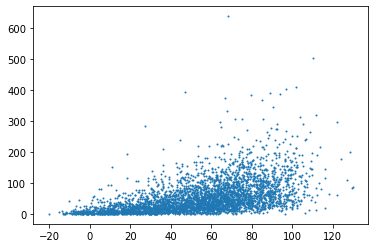

In [16]:
plt.scatter(lin_reg.predict(X_test), y_test, s = 1)

## First attempt at correction: ridge regression

In [84]:
cv_ridge = sklearn.model_selection.RandomizedSearchCV(Ridge(), {'alpha' : list(np.arange(0.01, 1000, 0.1))}, 
                                                      scoring = 'neg_mean_squared_error',
                                                     n_iter = 1000, random_state = 0)

In [85]:
cv_ridge_res = cv_ridge.fit(X_train, y_train)

In [86]:
cv_ridge_res.cv_results_['params'] ##see what got tested

[{'alpha': 939.4100000000001},
 {'alpha': 89.81000000000002},
 {'alpha': 239.81},
 {'alpha': 590.61},
 {'alpha': 234.31},
 {'alpha': 822.51},
 {'alpha': 550.61},
 {'alpha': 645.11},
 {'alpha': 267.01},
 {'alpha': 349.71000000000004},
 {'alpha': 108.71000000000001},
 {'alpha': 181.91},
 {'alpha': 230.81},
 {'alpha': 608.41},
 {'alpha': 372.41},
 {'alpha': 318.41},
 {'alpha': 638.71},
 {'alpha': 372.81},
 {'alpha': 270.21},
 {'alpha': 788.3100000000001},
 {'alpha': 293.01},
 {'alpha': 598.8100000000001},
 {'alpha': 489.01},
 {'alpha': 671.8100000000001},
 {'alpha': 542.3100000000001},
 {'alpha': 321.31},
 {'alpha': 301.71},
 {'alpha': 38.21},
 {'alpha': 423.71000000000004},
 {'alpha': 472.11},
 {'alpha': 954.71},
 {'alpha': 947.71},
 {'alpha': 479.51},
 {'alpha': 474.71000000000004},
 {'alpha': 936.61},
 {'alpha': 533.41},
 {'alpha': 665.21},
 {'alpha': 903.21},
 {'alpha': 58.01},
 {'alpha': 949.11},
 {'alpha': 652.61},
 {'alpha': 434.61},
 {'alpha': 497.41},
 {'alpha': 791.3100000000001

In [87]:
alpha_ridge= cv_ridge_res.best_params_['alpha']
alpha_ridge 

465.91

In [88]:
ridge_reg = Ridge(fit_intercept = True, alpha = alpha_ridge ).fit(X_train, y_train)
ridge_reg.coef_

array([ 0.        , -3.40698826, -4.79272568,  0.75623694,  8.6269745 ,
       -7.00184133,  7.51287514, -0.51103381,  0.98344092, -0.54062229,
       -0.12939547, -0.82336942,  3.88791751, -0.70643857,  1.03586178,
        0.85446071, -0.46631085,  0.90254311,  1.38709078,  1.94848113,
       -0.85297327, -1.25438205, -1.24655278, -0.5394346 , -0.66189659,
       -0.89418544,  1.16191804, -1.3231062 ,  0.65199649, -0.48842022,
       -0.95843293, -1.4225323 , -0.33516553, -0.17370666, -0.02780636,
        0.35367338,  0.17528123,  0.61672174, -0.81098293,  0.51204157,
       -0.51507957,  1.17574822,  2.42984498, -2.90044929, -0.7251126 ,
        0.54248959, -1.19267042,  0.06404895, -0.47985945,  0.13028607,
        0.5500104 ,  1.57293486, -0.00920094, -0.51845435,  0.80947811,
        0.20556116, -0.67662845, -0.89755612, -0.38110507])

In [89]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, ridge_reg.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, ridge_reg.predict(X_test)))

training error
2235.5943807088115
testing error
2073.1758817861514


In [90]:
sklearn.metrics.r2_score(y_train, ridge_reg.predict(X_train))

0.2556001523096778

## lasso regression

In [24]:
cv_lasso = sklearn.model_selection.RandomizedSearchCV(Lasso(), {'alpha' : np.arange(0.001, 1, 0.1)}, 
                                                      scoring = 'neg_mean_squared_error',
                                                     n_iter = 1000, random_state = 0)

In [25]:
cv_lasso_res = cv_lasso.fit(X_train, y_train)

C:\Users\couga\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 10 is smaller than n_iter=1000. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\couga\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5784.2737769298255, tolerance: 3729.7450584281946
  model = cd_fast.enet_coordinate_descent(


In [26]:
cv_lasso_res.cv_results_['params'] ##see what got tested
alpha_lasso= cv_lasso_res.best_params_['alpha']
alpha_lasso

0.101

In [27]:
lasso_reg = Lasso(fit_intercept = True, alpha = alpha_lasso).fit(X_train, y_train)
lasso_reg.coef_

array([-3.39625351, -4.82915924,  0.73515195,  8.64192976, -3.62226777,
       11.44632628, -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  3.99423501, -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  2.07891614, -2.5355234 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.95794911, -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ])

In [28]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, lasso_reg.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, lasso_reg.predict(X_test)))

training error
2237.9909078033143
testing error
2074.0493798330212


In [29]:
sklearn.metrics.r2_score(y_train, lasso_reg.predict(X_train))

0.25480216568941816

## random forest

In [48]:
cv_rf = sklearn.model_selection.RandomizedSearchCV(RandomForestRegressor(random_state = 0), 
                                                      {'n_estimators' : range(1,15), 'max_depth' : range(1,10)}, 
                                                      scoring = 'neg_mean_squared_error',
                                                n_iter = 10)

In [54]:
cv_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': range(1, 10),
                                        'n_estimators': range(1, 15)},
                   scoring='neg_mean_squared_error')

In [55]:
cv_rf.cv_results_['params'] ##see what got tested
n_est = cv_rf.best_params_['n_estimators']
max_depth = cv_rf.best_params_['max_depth']
n_est, max_depth

(8, 6)

In [56]:
rf = RandomForestRegressor(n_estimators = n_est, max_depth = max_depth).fit(X_train, y_train)
rf.feature_importances_

array([0.10979395, 0.1415752 , 0.08378263, 0.56138705, 0.01310049,
       0.04242543, 0.00005451, 0.00015683, 0.0008459 , 0.00024649,
       0.00052397, 0.00126007, 0.00196449, 0.0000296 , 0.        ,
       0.        , 0.        , 0.00045506, 0.00143656, 0.        ,
       0.        , 0.00089583, 0.        , 0.00398855, 0.        ,
       0.        , 0.00029529, 0.00595143, 0.        , 0.00168081,
       0.00030677, 0.        , 0.        , 0.        , 0.        ,
       0.00007865, 0.00265741, 0.        , 0.00090703, 0.0003871 ,
       0.00161258, 0.00750049, 0.00182832, 0.00011297, 0.00118732,
       0.0002453 , 0.00012798, 0.00020189, 0.        , 0.00480736,
       0.00020094, 0.00048438, 0.00206254, 0.        , 0.00090577,
       0.00253509, 0.        , 0.        ])

In [57]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, rf.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, rf.predict(X_test)))

training error
1993.7779982326156
testing error
1972.593666394607


In [58]:
sklearn.metrics.r2_score(y_train, rf.predict(X_train))

0.3361192660798744

In [117]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    top = fi_df.head(10)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=top['feature_importance'], y=top['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

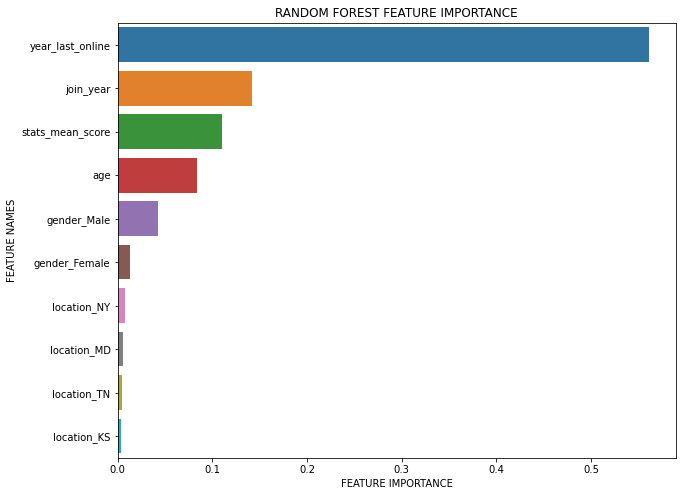

In [118]:
plot_feature_importance(rf.feature_importances_,X_train.columns,'RANDOM FOREST')

## gradient boosting

In [36]:
cv_gb = sklearn.model_selection.RandomizedSearchCV(GradientBoostingRegressor(random_state = 0), 
                                                      {'n_estimators' : range(1,15), 'max_depth' : range(1,10), 
                                                      'learning_rate' : [0.01, 0.1, 0.5, 1, 2, 3, 5, 10]}, 
                                                      scoring = 'neg_mean_squared_error',
                                                     n_iter = 10, random_state = 0)

In [93]:
cv_gb.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=0),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1, 2,
                                                          3, 5, 10],
                                        'max_depth': range(1, 10),
                                        'n_estimators': range(1, 15)},
                   random_state=0, scoring='neg_mean_squared_error')

In [94]:
cv_gb.cv_results_['params'] ##see what got tested
n_est = cv_gb.best_params_['n_estimators']
max_depth = cv_gb.best_params_['max_depth']
learning_rate = cv_gb.best_params_['learning_rate']
n_est, max_depth, learning_rate

(11, 5, 0.1)

In [95]:
gb = GradientBoostingRegressor(n_estimators = n_est, max_depth = max_depth, 
                               learning_rate = learning_rate).fit(X_train, y_train)
gb.feature_importances_

array([0.        , 0.09600979, 0.14087486, 0.0680542 , 0.62012131,
       0.01534293, 0.04645373, 0.        , 0.00024919, 0.        ,
       0.        , 0.        , 0.00127752, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00246975,
       0.        , 0.        , 0.        , 0.00136649, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00104096, 0.        , 0.        ,
       0.00129384, 0.        , 0.00222566, 0.        , 0.        ,
       0.        , 0.00021358, 0.00013377, 0.00003494, 0.        ,
       0.00283748, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [96]:
print("training error")
print(sklearn.metrics.mean_squared_error(y_train, gb.predict(X_train)))
print("testing error")
print(sklearn.metrics.mean_squared_error(y_test, gb.predict(X_test)))

training error
2165.7681706191606
testing error
2048.566358048403


In [97]:
sklearn.metrics.r2_score(y_train, gb.predict(X_train))

0.2788506223430872

# Data Viz

In [128]:
y_test.describe()

count    3801.000000
mean       53.039860
std        52.849892
min         0.510417
25%        16.538889
50%        37.720833
75%        72.828472
max       639.265255
Name: user_days_spent_watching, dtype: float64

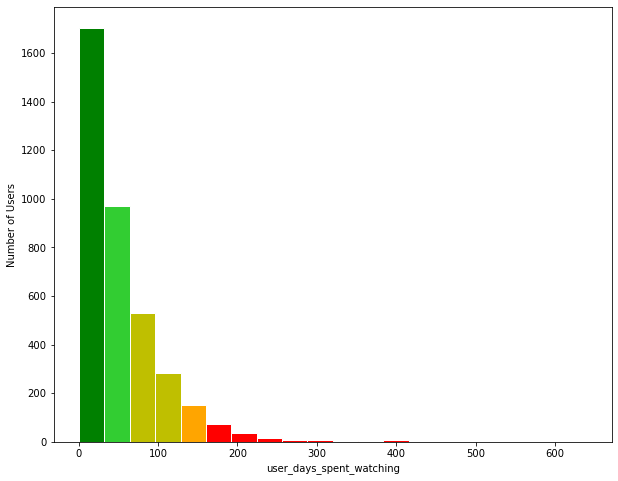

In [162]:

fig, ax = plt.subplots(figsize=(10,8))
N, bins, patches = ax.hist(y_test, bins=20, edgecolor='white', linewidth=1)

for i in range(0,1):
    patches[i].set_facecolor('g')
for i in range(1,2):    
    patches[i].set_facecolor('limegreen')
for i in range(2,4):    
    patches[i].set_facecolor('y')
for i in range(4,5):    
    patches[i].set_facecolor('orange')
for i in range(5, len(patches)):
    patches[i].set_facecolor('r')

plt.xlabel("user_days_spent_watching")
plt.ylabel("Number of Users")
plt.show()